# Visualizando as funções de ativação da MLP

## Importando as bibliotecas

In [1]:
import numpy as np
from tensorflow.keras import activations

import matplotlib.pyplot as plt
import seaborn as sns # a biblioteca 'seaborn' contém vários estilos para os gráficos do 'matpĺotlib'

# agora, melhoramos a qualidade de saida e de visualizacao da imagem 
# alem de mudar a fonte padrao para uma do latex
sns.set_style("ticks")
plt.rcParams['savefig.dpi'] = 200
plt.rcParams["figure.dpi"] = 100

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [6]:
x = np.linspace(-4, 4, 1000)

In [7]:
def selu_derivada(input):
    alpha = 1.67326324
    lamb = 1.05070098
    saida = []

    for i in range(0, len(input)):
        if (input[i] >= 0):
            saida.append(lamb)
        else:
            saida.append(alpha*lamb*(np.exp(input[i])))
    return saida

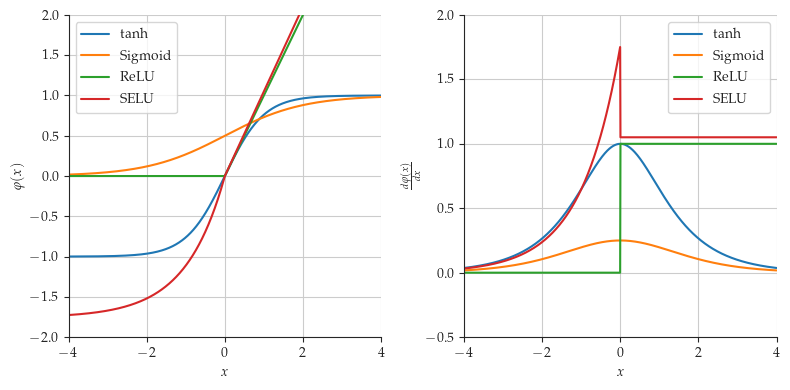

In [8]:
fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(8,4))

ax[0].plot(x, np.tanh(x), label=r"$\tanh$")
ax[0].plot(x, activations.sigmoid(x), label=r"Sigmoid")
ax[0].plot(x, activations.relu(x), label=r"ReLU")
ax[0].plot(x, activations.selu(x), label=r"SELU")

ax[0].set_xlabel("$x$")
ax[0].set_ylabel(r"$\varphi(x)$")
ax[0].set_xlim(-4,4)
ax[0].set_ylim(-2,2)
ax[0].grid(True)
ax[0].legend()

ax[1].plot(x, 1/np.cosh(x), label=r"$\tanh$")
ax[1].plot(x, activations.sigmoid(x)*(1-activations.sigmoid(x)), label=r"Sigmoid")
ax[1].plot(x, (x > 0) * 1, label=r"ReLU")
ax[1].plot(x, selu_derivada(x), label=r"SELU")

ax[1].set_xlabel("$x$")
ax[1].set_ylabel(r"$\frac{d\varphi(x)}{dx}$")
ax[1].set_xlim(-4,4)
ax[1].set_ylim(-0.5,2)
ax[1].grid(True)
ax[1].legend()

sns.despine()
fig.savefig("../../reports/relatorio-ee015/figures/mlp-activations.png")